# Support Vector Machines

### Linear case

In this first part, we deal with a linear SVM. In this simple version, SVM reduces to a linear classfier $h(x)$ (or Linear Discriminant Analysis) parametrized by $\mathbf{w}$ and $b$ separating space by the hyperplane equation $\mathbf{w} \cdot \mathbf{x} + b = 0$

Formally, we set $(\mathbf{x_i},y_i)_{i=1}^n$ a set of $n$ training points,
with $\mathbf{x_i} \in \mathbb{R}^d$ and $y_i \in \{ -1, 1\}.$
We then solve for $\mathbf{w},b$:
\begin{array}{ll}
\mbox{minimize } &\frac{1}{2}~||\mathbf{w}||^2 + C \sum_{i=1}^n \zeta_i \\
\mbox{under constraints } &
\forall i, \quad y_i(\mathbf{w}\cdot\mathbf{x_i} +  b) \geq 1 - \zeta_i  \\
 & \forall i,\quad \zeta_i  \geq 0\\
\end{array}

We then obtain a series of coefficients $(\alpha_i)_{i=1}^n, \alpha_i \geq 0$ and

$\mathbf{w}=\sum_{i=1}^n \alpha_i y_i \mathbf{x_i}$

$h(\mathbf{x}) =  \mathbf{w}.\mathbf{x} + b$


vecotrs $\mathbf{x_i}$ such that $\alpha_i > 0$ are called support vectors.

### Questions :
    
- Linearly separable case :    
   - Generate a linearly separable training set made of 50 examples with 2 features named $x_1,x_2$ (for instance, positive labels when $x_1 >0$).
   - Plot this training set with colored labels (markers).
   - Train a linear SVM (*from sklearn.svm import LinearSVC*).
   - Plot the decision frontier (use *plot_boundary*, provided below).

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.svm
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [2]:
def plot_boundary(clf, X, y):
    h = 0.002 ## grid mesh size
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) ## prediction value by zone
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
#     plt.xlim([0,1])
#     plt.ylim([0,1])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0


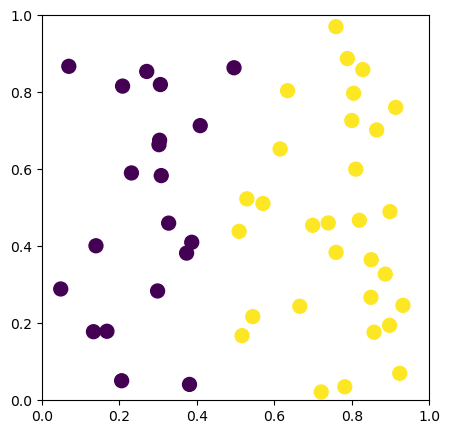

<Figure size 640x480 with 0 Axes>

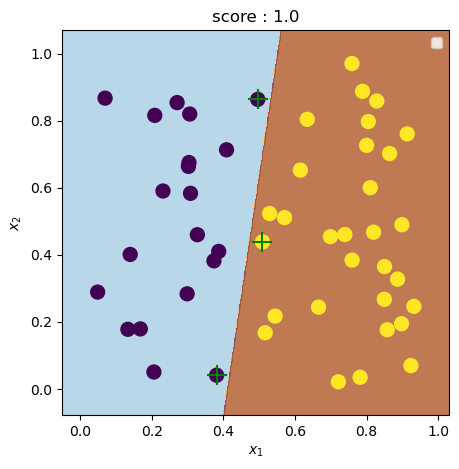

In [3]:
np.random.seed(21)
X = np.random.rand(50,2)
y = X[:,0] > 0.5  ## this is a boolean variable
plt.figure(1,[5,5])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(X[:,0],X[:,1], c = y, s = 100)


plt.figure()
C = 1000
# clf = sklearn.svm.LinearSVC(C=C)
clf = sklearn.svm.SVC(C=C, kernel="linear")
clf.fit(X,y)
print("training score:",clf.score(X,y))
plot_boundary(clf,X,y)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='+')


- "Not really linearly separable" case:
   - On this set, add noise to the label $y$: i.e. with probability $ p $, flip the label: $ y_i = 1-y_i $.
   - Plot this noisy training set.
   - Make a test set (drawn from the same distribution). 
   - Train a linear SVM and vary the parameter C. For each value of C, compute the train and test error (and plot the decision boundary). 

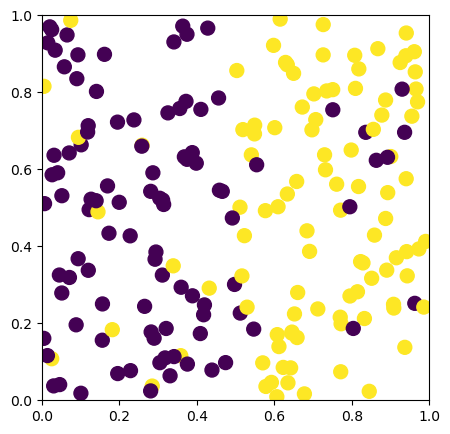

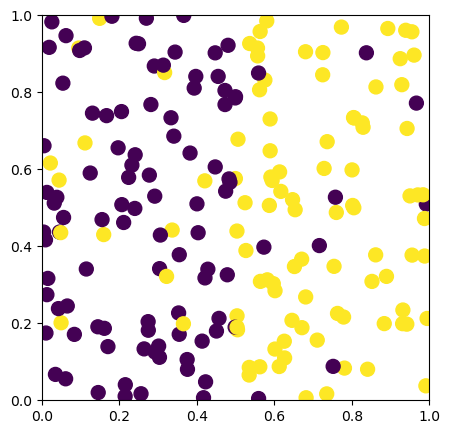

In [4]:
def build_noisy_set(Nset, p, seed):
    np.random.seed(seed)
    X = np.random.rand(Nset,2)
    y = X[:,0] > 0.5
    points_to_flip = (np.random.random(Nset) < p )
    y[points_to_flip] = 1 - y[points_to_flip]
    
    plt.figure(figsize=[5,5])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.scatter(X[:,0],X[:,1], c = y, s = 100)
    return X,y
X, y         = build_noisy_set(200, 0.1, 42)
Xtest, ytest = build_noisy_set(200, 0.1, 42424)

C= 1e-05    training score: 0.51    test score: 0.49


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 0.0001    training score: 0.51    test score: 0.49


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 0.001    training score: 0.51    test score: 0.49


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 0.01    training score: 0.51    test score: 0.49


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 0.1    training score: 0.87    test score: 0.855


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 1    training score: 0.885    test score: 0.875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 10    training score: 0.87    test score: 0.875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 100    training score: 0.87    test score: 0.875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 1000    training score: 0.87    test score: 0.875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C= 10000    training score: 0.87    test score: 0.875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


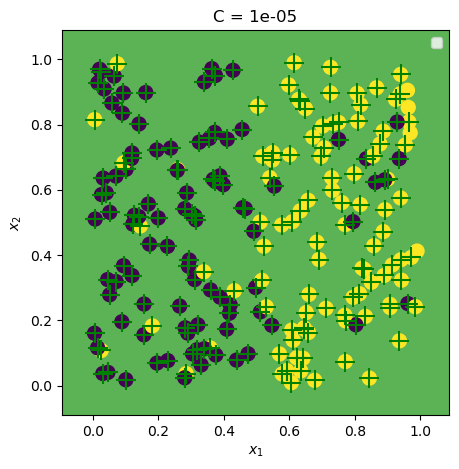

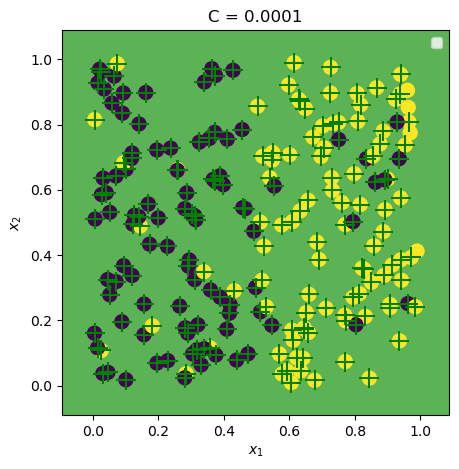

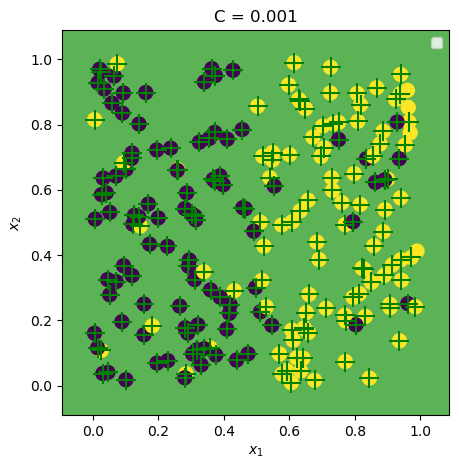

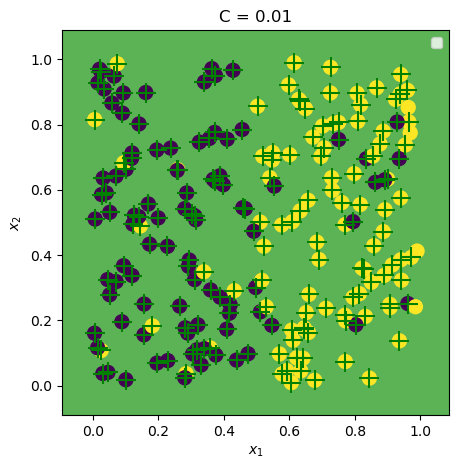

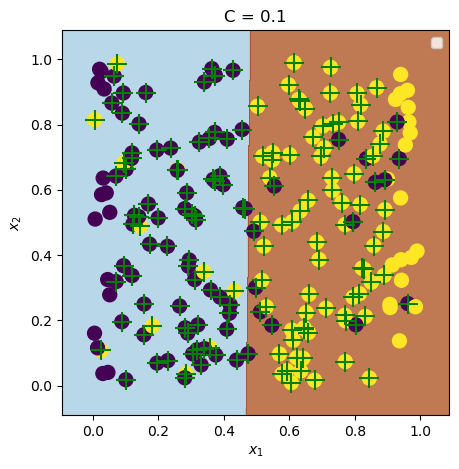

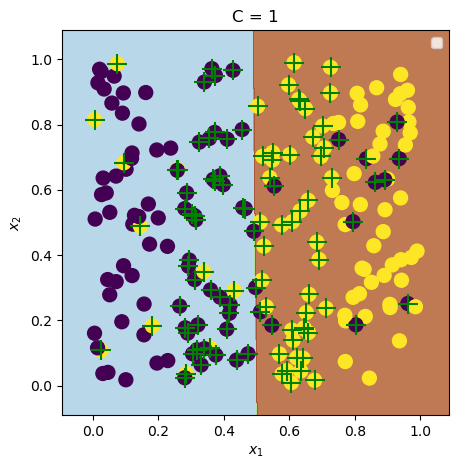

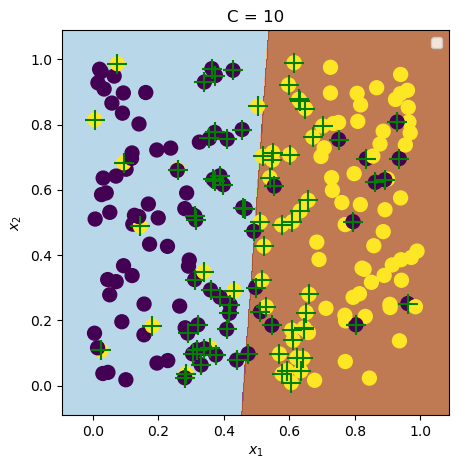

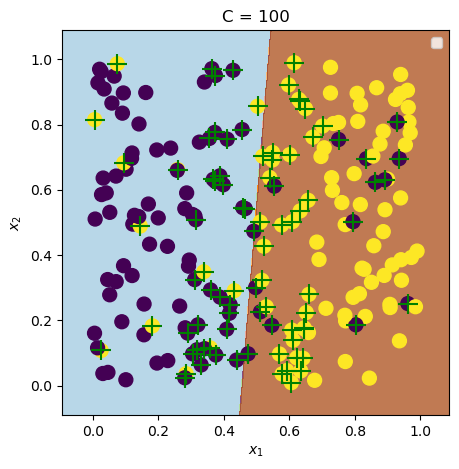

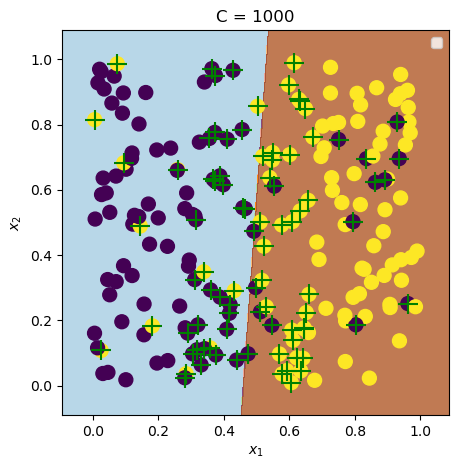

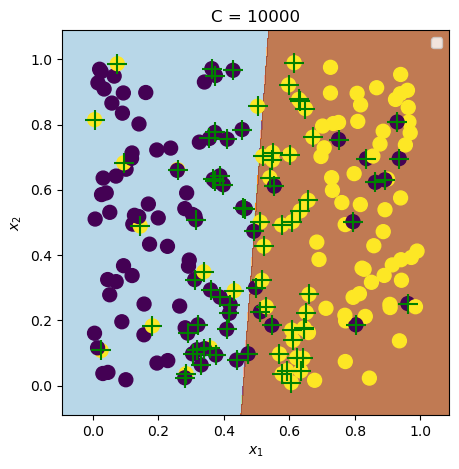

In [5]:
linear_training_score = []
linear_test_score = []
Cvalues=[]

for C in [10**x for x in range(-5,5,1)]:
#     clf = sklearn.svm.LinearSVC(C=C)
    clf = sklearn.svm.SVC(C=C, kernel="linear")
    clf.fit(X,y)
    trainscore = clf.score(X,y)
    testscore = clf.score(Xtest,ytest)
    print("C=", C, "   training score:",trainscore, "   test score:",testscore)
    linear_training_score.append(trainscore)
    linear_test_score.append(     testscore)
    Cvalues.append( C)
    plot_boundary(clf,X,y)
    
    # if we use SVC, kernel = linear
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='+')

    # if we use sklearn.svm.LinearSVC
#     # obtain the support vectors through the decision function
#     decision_function = clf.decision_function(X)
#     # we can also calculate the decision function manually
#     # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
#     support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
#     support_vectors = X[support_vector_indices]
#     plt.scatter(support_vectors[:,0],support_vectors[:,1], c = 'green', s = 200, marker='+')
    
    plt.title('C = ' + str(C))


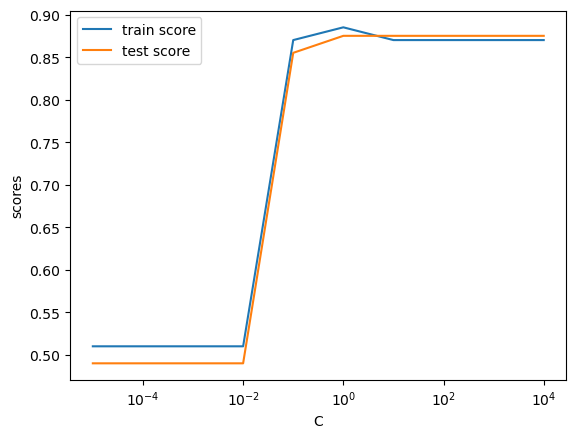

In [6]:
plt.figure()
plt.semilogx(Cvalues, linear_training_score, label= "train score")
plt.plot(Cvalues, linear_test_score, label= "test score")
plt.xlabel("C")
plt.ylabel("scores")
plt.legend()

- XOR case:
     - generate the following training set:
         X = [(0,0), (1,0), (0,1), (1,1)] and y = (1,0,0,1)
     - plot this training set with color labels.
     - train a linear SVM (from sklearn.svm import LinearSVC)
     - display the decision frontier

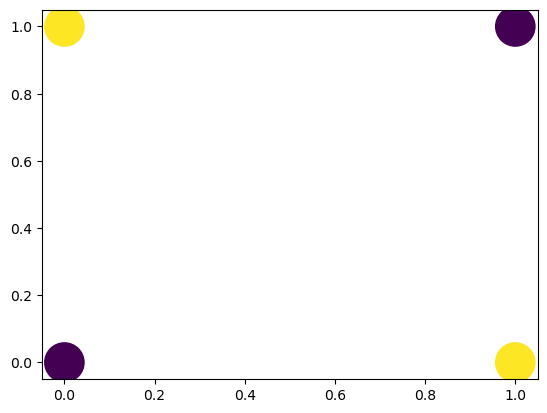

In [7]:
X_xor  = np.asarray([[0,0],[1,1],[1,0],[0,1]])
y_xor = np.asarray([0,0,1,1])
plt.scatter(X_xor[:,0],X_xor[:,1], c = y_xor, s = 800)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.5


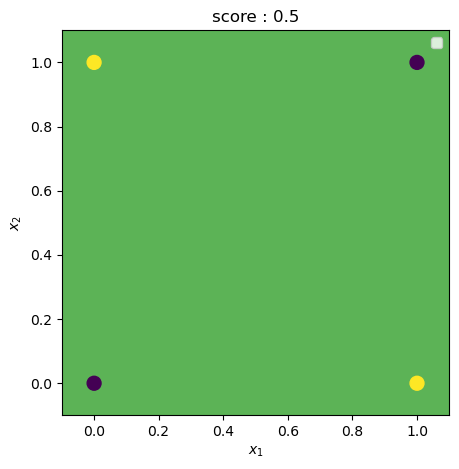

In [8]:
clf_xor = sklearn.svm.LinearSVC(C=1)
# clf_xor = sklearn.svm.SVC(C=1, kernel='linear')
clf_xor.fit(X_xor,y_xor)
print("training score:",clf_xor.score(X_xor,y_xor))

plot_boundary(clf_xor,X_xor,y_xor)

### Unexplained behavior : 

Unexplained behavior  of the method `sklearn.svm.SVC(C=1, kernel='linear'` comapred to `sklearn.svm.LinearSVC(C=1)` (which does work fine, instead)

training score: 0.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


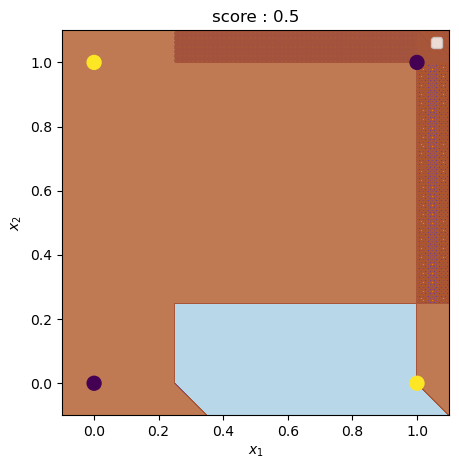

In [9]:
# clf_xor = sklearn.svm.LinearSVC(C=1)
clf_xor = sklearn.svm.SVC(C=1, kernel='linear', shrinking=False, tol=1e-1, break_ties=True)
clf_xor.fit(X_xor,y_xor)
print("training score:",clf_xor.score(X_xor,y_xor))

plot_boundary(clf_xor,X_xor,y_xor)

In [10]:
clf_xor.coef_, clf_xor.coef0, clf_xor.dual_coef_,clf_xor.intercept_

(array([[0., 0.]]), 0.0, array([[-1., -1.,  1.,  1.]]), array([-0.]))

training score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


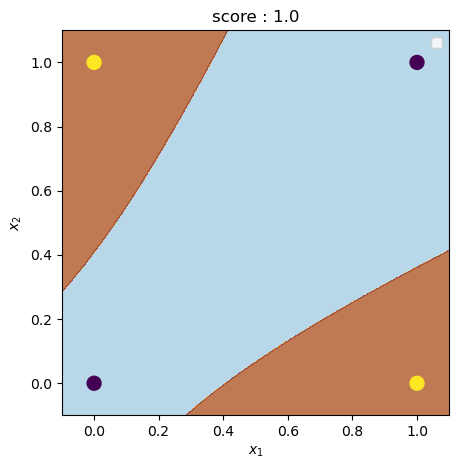

In [11]:
# clf_xor = sklearn.svm.LinearSVC(C=1)
clf_xor = sklearn.svm.SVC(C=1, kernel='poly', degree=2)
clf_xor.fit(X_xor,y_xor)
print("training score:",clf_xor.score(X_xor,y_xor))

plot_boundary(clf_xor,X_xor,y_xor)

### Non linear case:

The "Kernel trick" allows to extend the hypothesis space $H(x)$ 
The idea is to embed the training data into a space of higher dimension (the so-called *feature space*).
This is done using a function $\phi(x)$.

The decision function $h(x)$ thus reads:

\begin{align} h(\mathbf{x}) =&  \sum_{i=1}^n \alpha_i y_i \phi(x_i) \cdot \phi(x) + b 
\\
=& \sum_{i=1}^n \alpha_i y_i K(\mathbf{x_i},\mathbf{x}) + b. 
\end{align}


#### Kernels : 

The kernel function $K(\mathbf{x},\mathbf{x'})$ is generlaly one of the following: 

- linear (no Kernel trick): $\langle x, x'\rangle.$

- polynomial: $(\gamma \langle x, x'\rangle + r)^d.$  where the degree $d$ is specified by the argument $degree$, r by $coef0$.

- Gaussian: $\exp(-\gamma |x-x'|^2).$ where $\gamma > 0$ is specified by the argument $gamma$.

- sigmoidal : $(\tanh(\gamma \langle x,x'\rangle + r))$, where $r$ is specified by the argument $coef0.$           

### Questions : 
- We need to generate non linearly separable data and display them with colors. We can use:
    - *from sklearn.datasets import make_moons* 
    - *X, y = make_moons(noise = 0.1)*

- With the same method, generate a test set.

- Train a SVM for each possible kernel, with a couple values of $C$ values each time.

- We can diaply the support vectors using the attribute $support\_vectors\_$

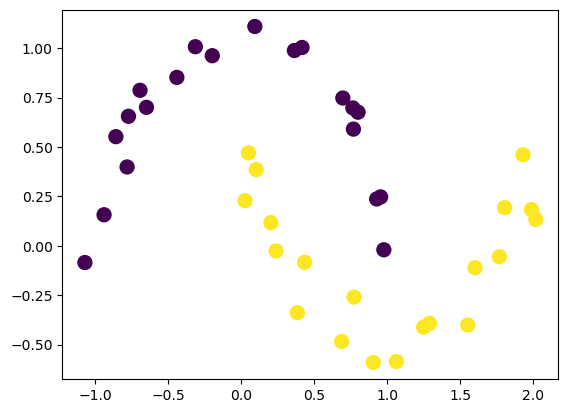

In [12]:

#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.datasets import make_moons
X, y = make_moons(noise = 0.1, random_state=1, n_samples=40)
plt.scatter(X[:,0],X[:,1], c = y, s = 100)

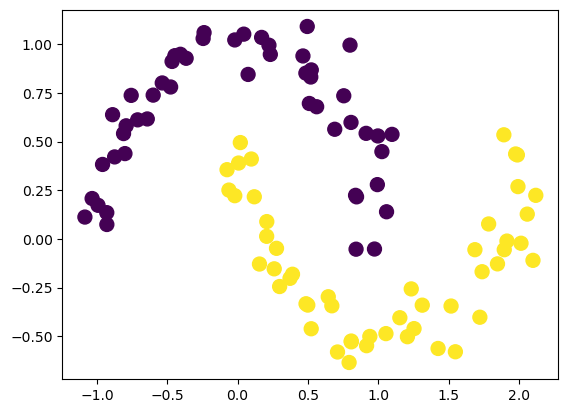

In [13]:
X_test, y_test = make_moons(noise = 0.1, random_state=321, n_samples=100)
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, s = 100)

In [14]:
def train_SVM_test_and_display(X,y,X_test,y_test, Crange, kernel='linear'):
    linear_training_score = []
    linear_test_score = []
    Cvalues=[]
    for C in [10**x for x in Crange]:
        if kernel == "poly":
            clf = sklearn.svm.SVC(C=C, kernel=kernel, degree = 3, coef0 = 1)
        elif kernel == "sigmoid":
            clf = sklearn.svm.SVC(C=C, kernel=kernel, coef0 = 1, gamma=0.01)
        else : 
            clf = sklearn.svm.SVC(C=C, kernel=kernel)
        clf.fit(X,y)
        trainscore = clf.score(X,y)
        testscore = clf.score(X_test,y_test)
        linear_training_score.append(trainscore)
        linear_test_score.append(testscore)
        Cvalues.append(C)
        print("training score:",trainscore, ". test score:", testscore)
        plot_boundary(clf,X,y)
        plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='+')
        plt.ylim([-0.8,1.25])
        plt.xlim([-1.25,2.25])
        plt.title("training score:"+str(trainscore)+ "  test score:"+str(testscore))
    plt.figure()
    plt.semilogx(Cvalues, linear_training_score, label= "train score")
    plt.plot(Cvalues, linear_test_score, label= "test score")
    plt.xlabel("C")
    plt.ylabel("scores")
    plt.legend()
    plt.ylim([0.5,1])
        

training score: 0.775 . test score: 0.78


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.825 . test score: 0.82


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.85 . test score: 0.87


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.85 . test score: 0.87


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


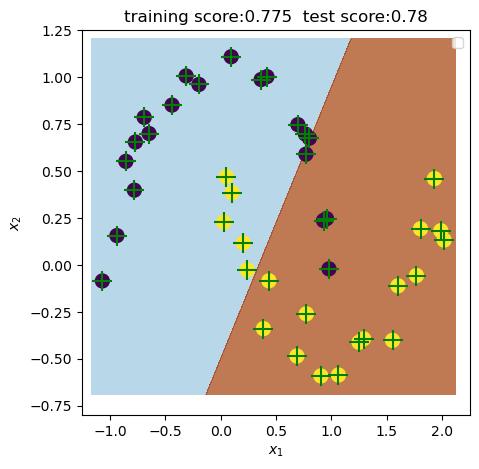

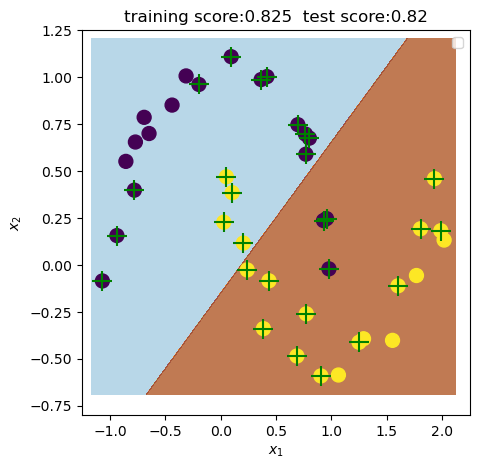

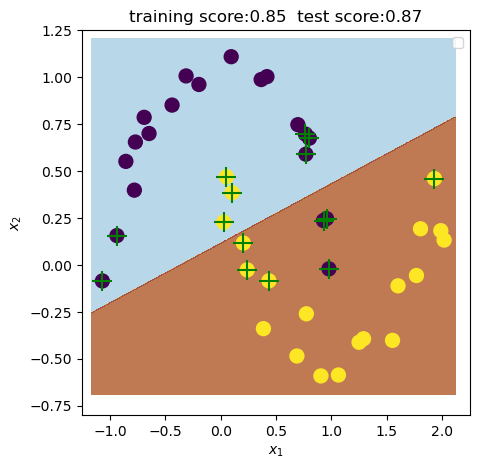

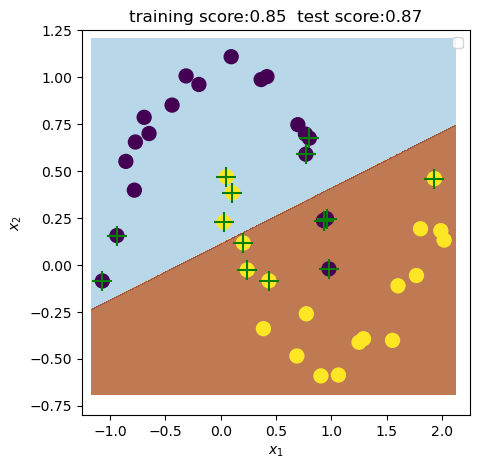

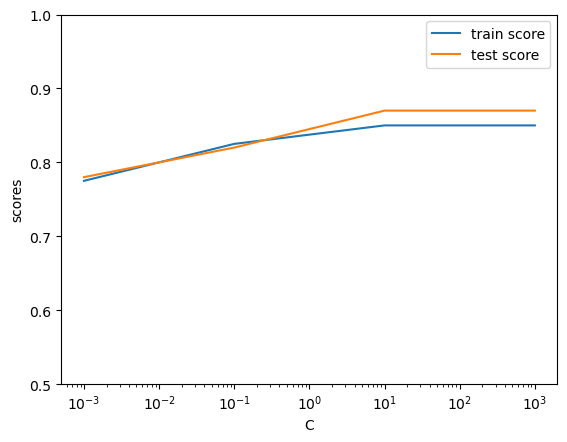

In [15]:
train_SVM_test_and_display(X,y,X_test,y_test, range(-3,5,2), kernel='linear')

training score: 0.675 . test score: 0.68


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.875 . test score: 0.89


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0 . test score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0 . test score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0 . test score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


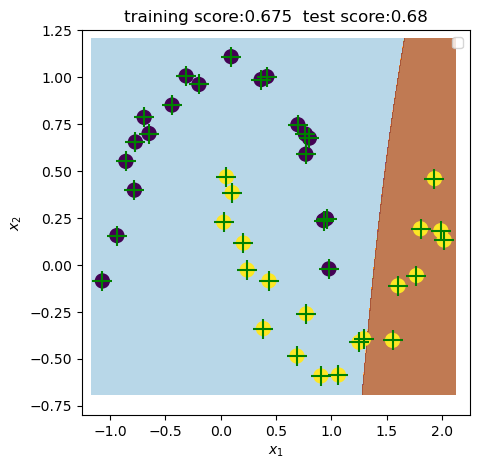

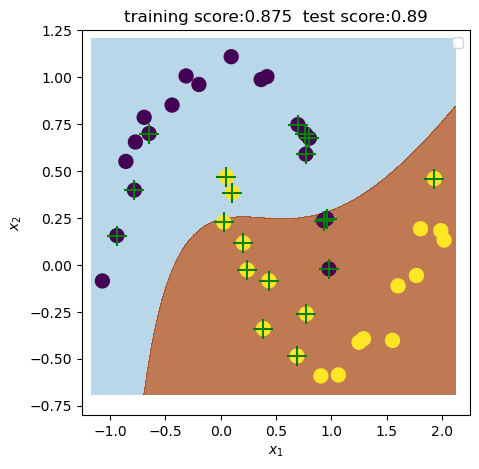

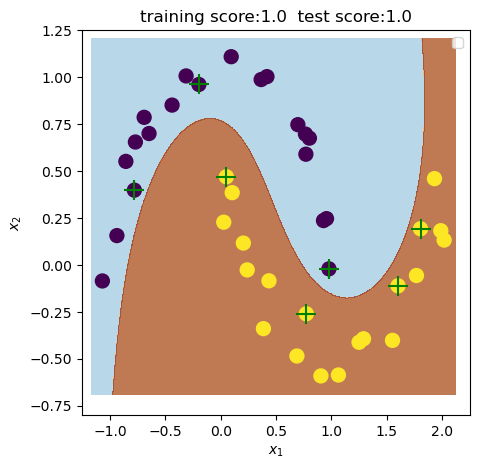

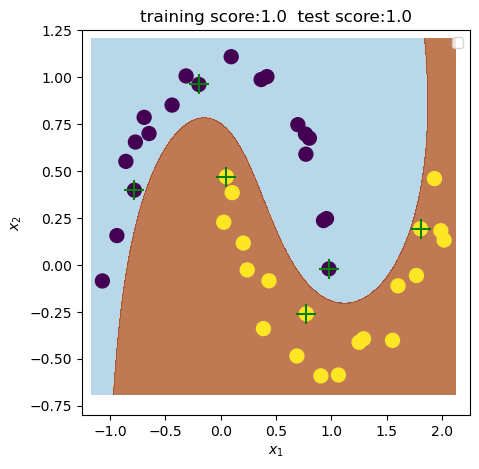

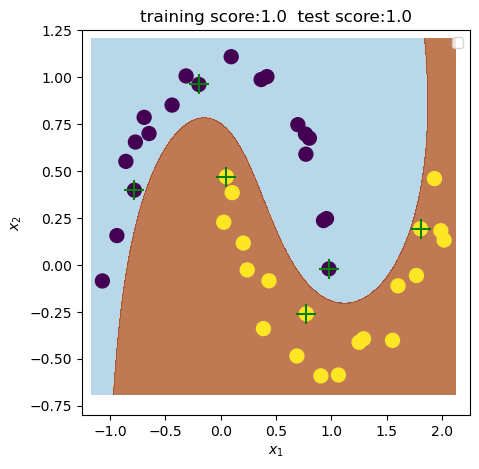

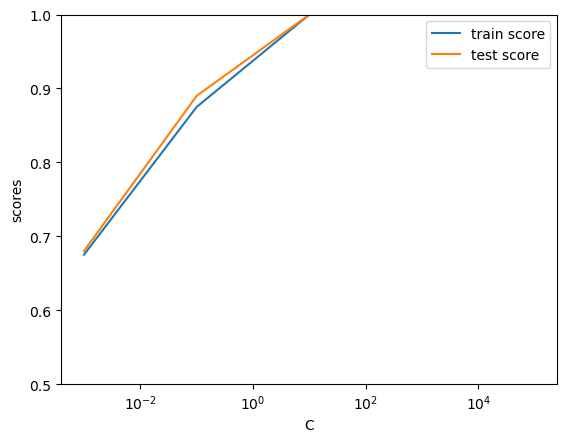

In [16]:
train_SVM_test_and_display(X,y,X_test,y_test, range(-3,6,2), kernel='poly') #default is degree 3 - IT MATTERS !

training score: 0.85 . test score: 0.86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.85 . test score: 0.86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0 . test score: 0.99


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0 . test score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 1.0 . test score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


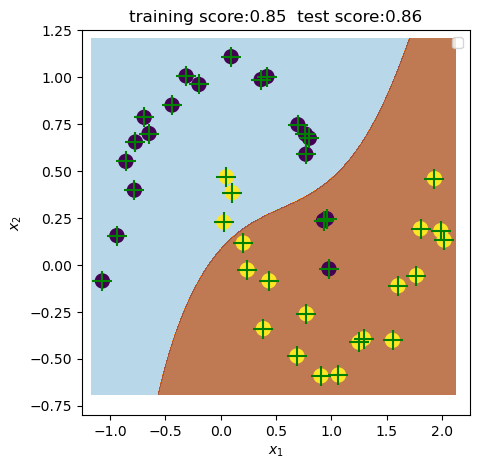

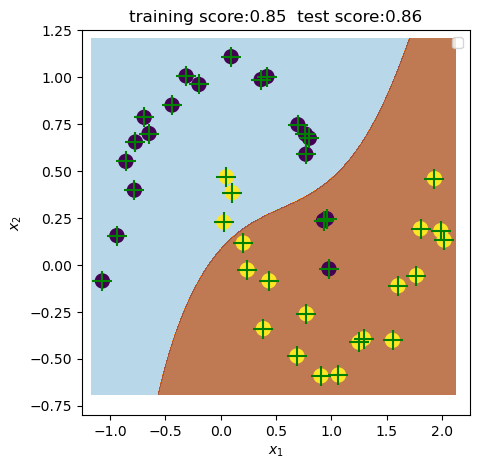

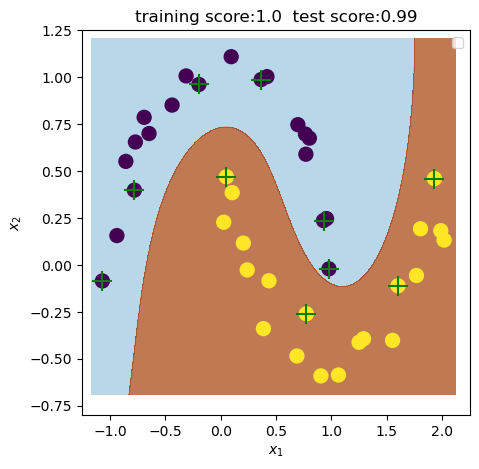

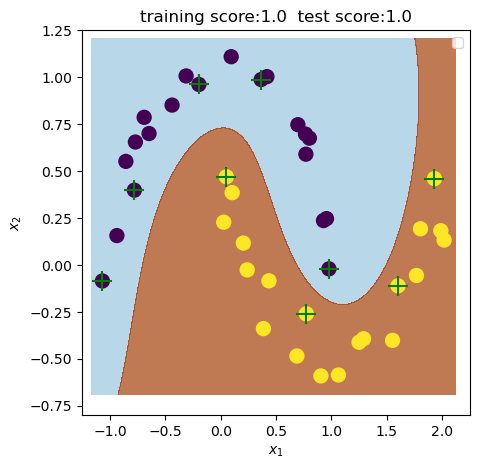

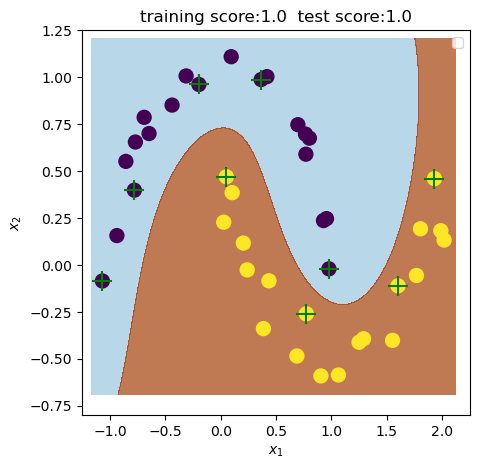

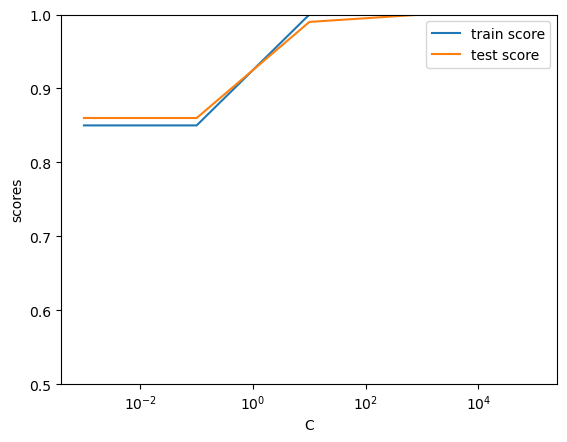

In [17]:
train_SVM_test_and_display(X,y,X_test,y_test, range(-3,6,2), kernel='rbf')

training score: 0.75 . test score: 0.78


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.75 . test score: 0.78


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.775 . test score: 0.79


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.825 . test score: 0.86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


training score: 0.725 . test score: 0.68


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


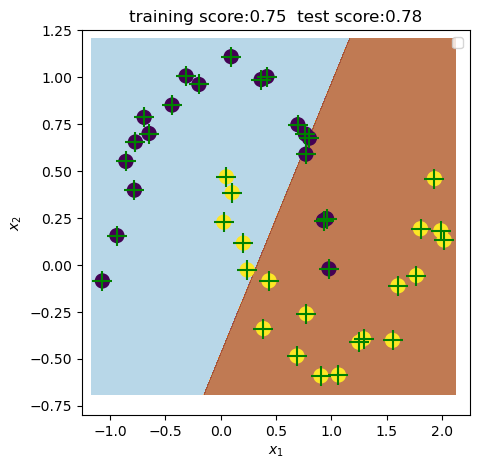

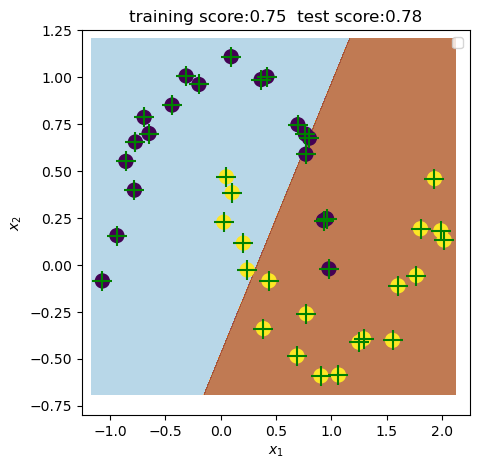

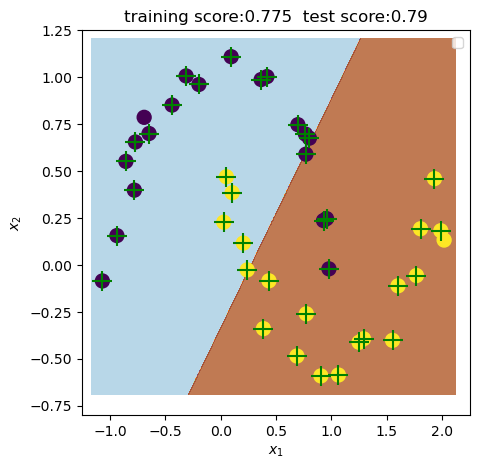

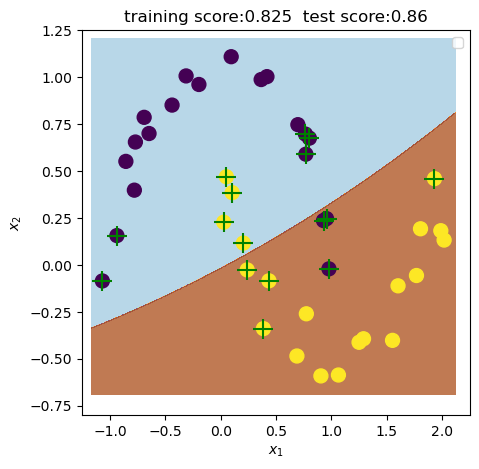

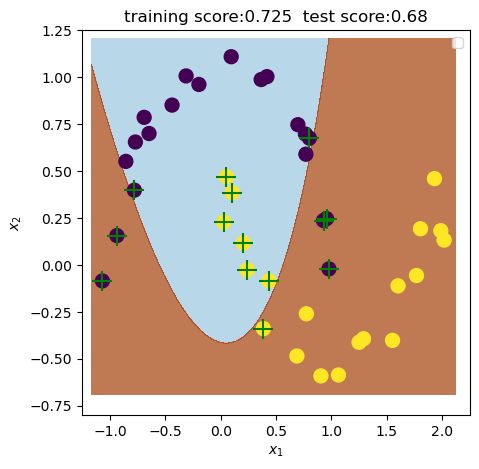

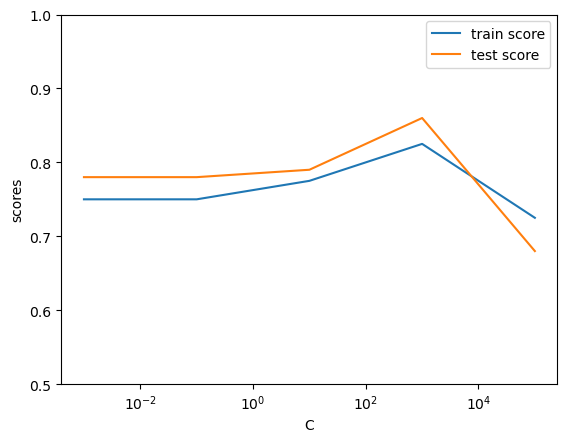

In [18]:
train_SVM_test_and_display(X,y,X_test,y_test, range(-3,6,2), kernel='sigmoid')

### Conclusion :     

On the hand-written digits (MNIST):
   - Train a decision tree 
   - Train a SVM 
   - Compare the results
   
In both cases, choose appropriate hyperparameters (using either train+test or simply test set).

For measuring scores, of course, you must use a validation set.

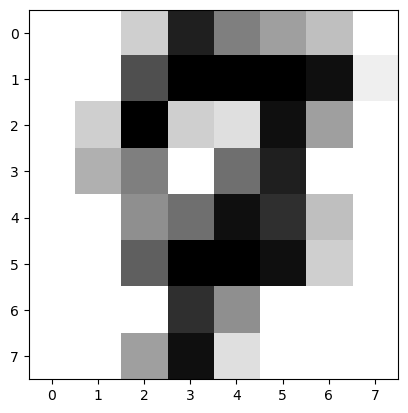

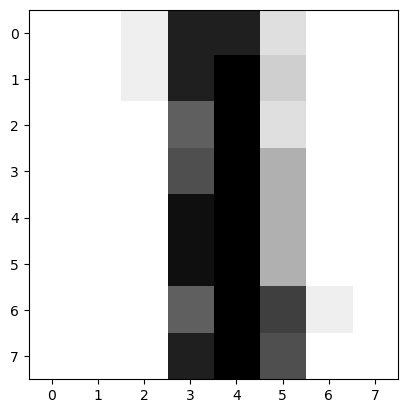

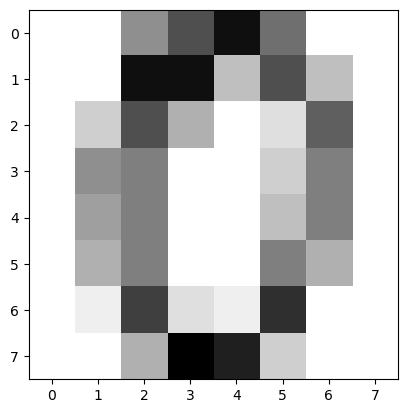

In [36]:
# Load the reduced-MNIST data (1800 images of 8x8)
from sklearn import datasets

digits = datasets.load_digits()
images = digits.images
n_samples = len(digits.images)

X = images.reshape((n_samples, -1))
y = digits.target

for image in images[np.random.choice(range(n_samples),3)]:
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='None')

In [20]:
X_train = X[0:n_samples // 2]
y_train = y[0:n_samples // 2]

X_test = X[n_samples // 2:(n_samples*3//4)]
y_test = y[n_samples // 2:(n_samples*3//4)]

X_valid = X[(n_samples*3//4):]
y_valid = y[(n_samples*3//4):]

print("X_train : {} examples, with 8*8 = {} features.".format(X_train.shape[0], X_train.shape[1]))

X_train : 898 examples, with 8*8 = 64 features.


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier(max_depth=12)
clf.fit(X_train,y_train)
print('score = ',clf.score(X_train,y_train), clf.score(X_valid,y_valid))

score =  1.0 0.7111111111111111


### This was the lazy way (in terms of hyper-parameters optimization)
 
### Let's do it for real

In [22]:
train_score =[]
test_score =[]
max_depth_values = []
for max_depth in range(1,20):
    clf = DecisionTreeClassifier(max_depth=max_depth) ## we have been a bit lazy with hyper-parameters optimization
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
    max_depth_values.append(max_depth)

best max_depth value: 14


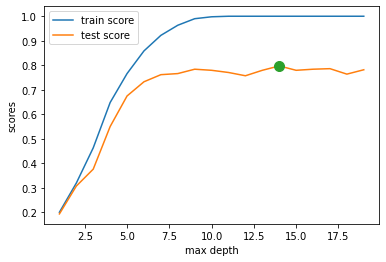

In [46]:
plt.figure()
plt.plot(max_depth_values, train_score, label= "train score")
plt.plot(max_depth_values, test_score, label= "test score")
plt.xlabel("max depth")
plt.ylabel("scores")
plt.legend()
best_max_depth = max_depth_values[np.argmax(test_score)]
print("best max_depth value:", best_max_depth)
plt.plot(best_max_depth, np.max(test_score), marker='o', markersize=10)

In [47]:
clf = DecisionTreeClassifier(max_depth=best_max_depth)
clf.fit(X_train,y_train)
print('score = ',clf.score(X_valid,y_valid)) 
## note: the method DecisionTreeClassifier is random, so it has random output

score =  0.7155555555555555


In [24]:
clf = sklearn.svm.SVC(gamma=0.001, C=1, kernel='rbf')
# http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

clf.fit(X_train,y_train)
print('SVC (RBF kernels) validation score = ',clf.score(X_valid,y_valid), " and train score:", clf.score(X_train,y_train))

SVC (RBF kernels) validation score =  0.9555555555555556  and train score: 0.9988864142538976


In [25]:
clf.support_vectors_.shape

(519, 64)

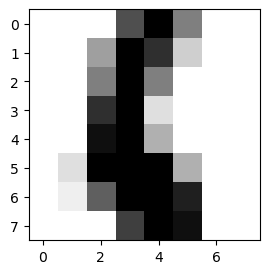

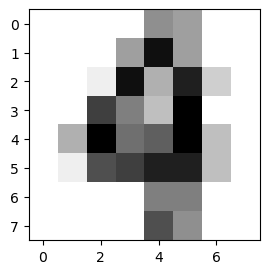

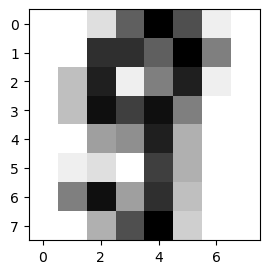

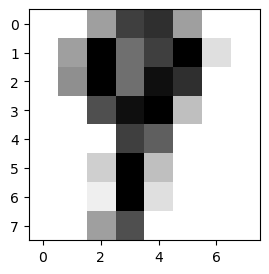

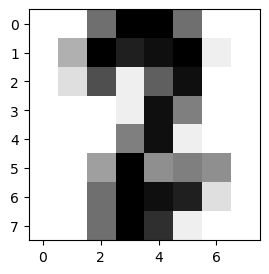

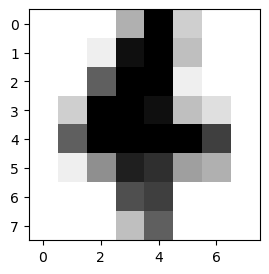

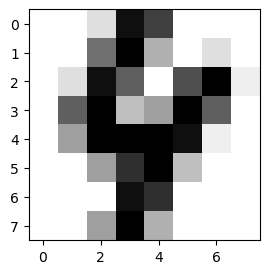

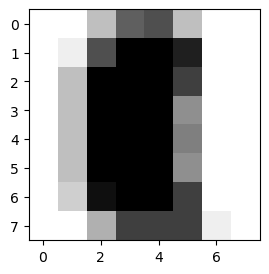

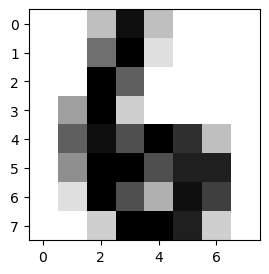

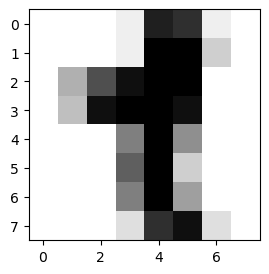

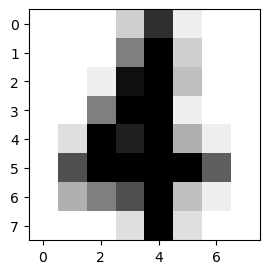

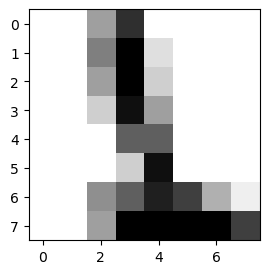

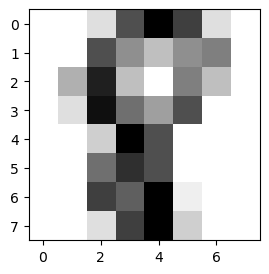

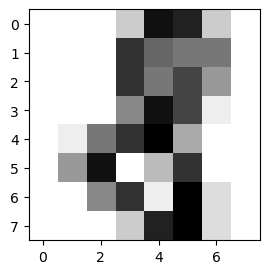

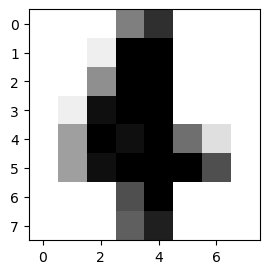

In [37]:
N_show=15
random_indices = list(np.random.choice(range(clf.support_vectors_.shape[0]),N_show))
for image_index in random_indices:
    image= clf.support_vectors_[image_index]
    plt.figure(image_index, [5,3])
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='None')

# BONUS: a bit of multi-class classification on the iris data set, 

# followed with SVR (Support Vector Regression)

In [26]:
def plot_boundary(clf, X, y):
    h = 0.002 ## grid mesh size
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) ## prediction value by zone
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()

### Multi-class:


In [27]:
from sklearn import datasets
import random
iris = datasets.load_iris()
"""
shuffled_index = np.arange(150)
random.shuffle(shuffled_index)
train_ind = shuffled_index[:120]
test_ind = shuffled_index[120:]

X = iris.data[train_ind, :2]
y = iris.target[train_ind]

X_test = iris.data[test_ind, :2]
y_test = iris.target[test_ind]
"""
X = iris.data[:, :2]
y = iris.target[:]

score d'entrainement: 0.6466666666666666


No handles with labels found to put in legend.


score d'entrainement: 0.6533333333333333


No handles with labels found to put in legend.


score d'entrainement: 0.7266666666666667


No handles with labels found to put in legend.
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


score d'entrainement: 0.8


No handles with labels found to put in legend.
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


score d'entrainement: 0.78


No handles with labels found to put in legend.
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


score d'entrainement: 0.76


No handles with labels found to put in legend.
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


score d'entrainement: 0.7933333333333333


No handles with labels found to put in legend.
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


score d'entrainement: 0.68


No handles with labels found to put in legend.


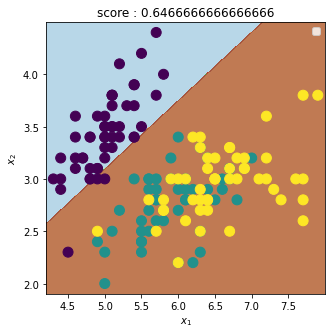

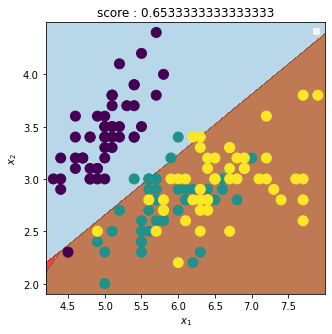

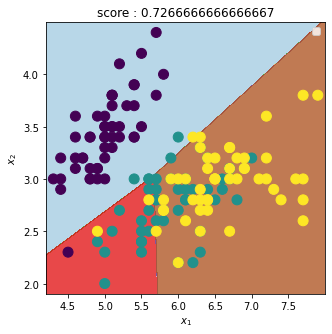

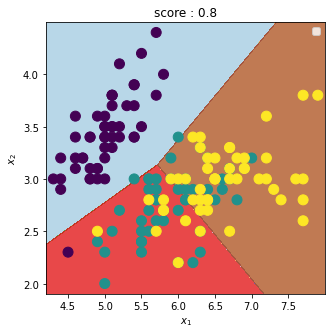

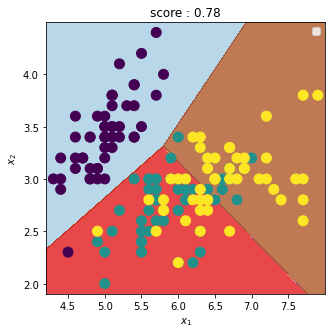

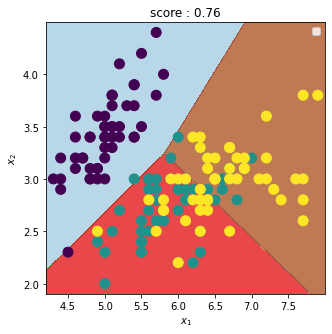

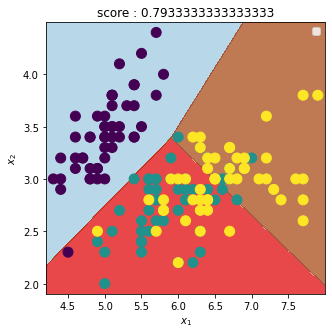

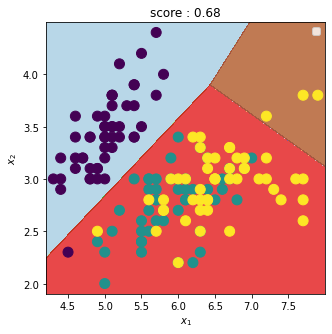

In [28]:
#LinearSVC
for C in [10**x for x in range(-3,5)]:
    clf = sklearn.svm.LinearSVC(C=C)
    clf.fit(X,y)
    print("score d'entrainement:",clf.score(X,y))
    plot_boundary(clf,X,y)

score d'entrainement: 0.76


No handles with labels found to put in legend.


score d'entrainement: 0.76


No handles with labels found to put in legend.


score d'entrainement: 0.8


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


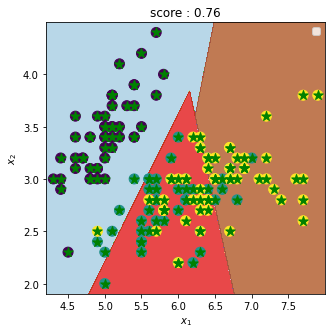

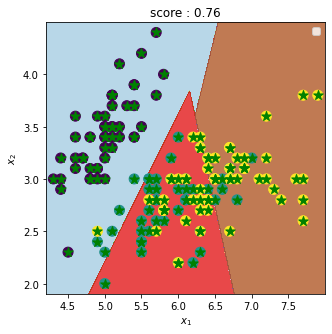

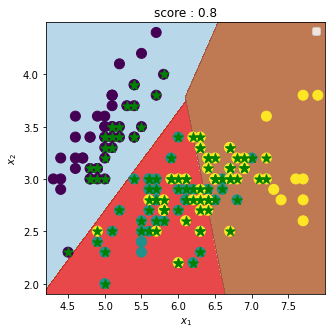

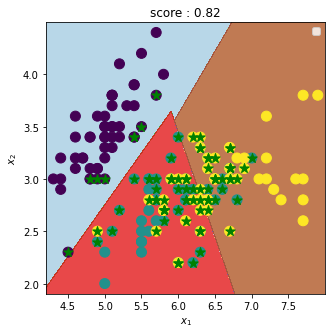

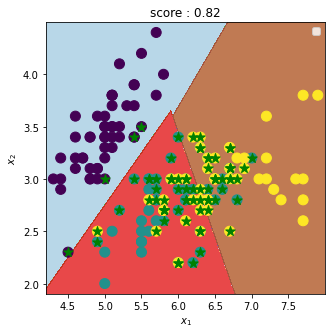

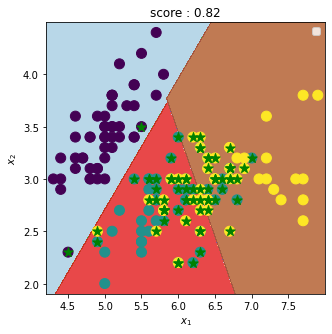

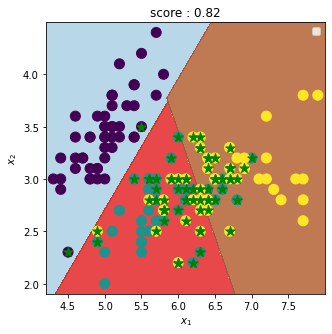

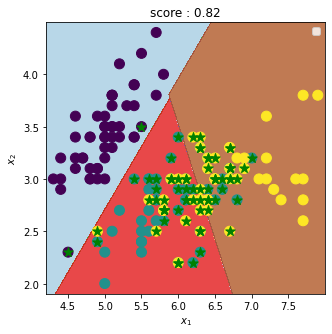

In [29]:
#kernel = linear
for C in [10**x for x in range(-3,5)]:
    clf = sklearn.svm.SVC(C=C, kernel='linear', coef0 = 1)
    clf.fit(X,y)
    print("score d'entrainement:",clf.score(X,y))
    plot_boundary(clf,X,y)
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 100, marker='*')

score d'entrainement: 0.8066666666666666


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


score d'entrainement: 0.8066666666666666


No handles with labels found to put in legend.


score d'entrainement: 0.82


No handles with labels found to put in legend.


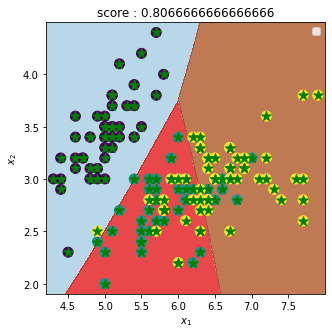

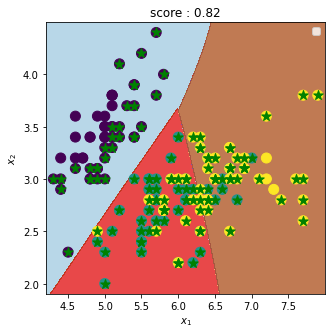

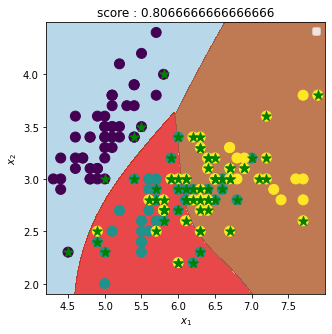

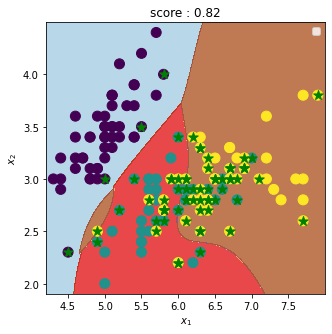

In [30]:
#kernel = rbf
for C in [10**x for x in range(-3,5,2)]:
    clf = sklearn.svm.SVC(C=C, kernel='rbf', coef0 = 1, gamma = 0.7)
    clf.fit(X,y)
    print("score d'entrainement:",clf.score(X,y))
    plot_boundary(clf,X,y)
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 100, marker='*')

In [31]:
X = iris.data
y = iris.target
#All features with kernel = rbf
for C in [10**x for x in range(-3,5,2)]:
    clf = sklearn.svm.SVC(C=C, kernel='rbf', coef0 = 1, gamma = 0.7)
    clf.fit(X,y)
    print("score d'entrainement:",clf.score(X,y))

score d'entrainement: 0.9533333333333334
score d'entrainement: 0.9733333333333334
score d'entrainement: 0.9866666666666667
score d'entrainement: 1.0


## BONUS: regression (SVR)

Compare the RBF and Linear kernels for this regression task:

In [32]:
from sklearn.svm import SVR
np.random.seed(42) # Fix the random seed
# Create a noisy sinus dataset
def regression_data():
    X = np.sort(6 * np.random.rand(120,1) - 3, axis=0)
    y = np.tanh(X).ravel()
    y[::5] += 3 * (0.5 - np.random.rand(24)) # ajout de bruit   
    X_test = np.arange(-3.0, 3.0, 0.05)[:, np.newaxis]
    y_test = np.tanh(X_test).ravel()
    return X,y,X_test,y_test

X,y,X_test,y_test = regression_data()

In [33]:
# kernel = linear
for C in [10**x for x in range(-3,5)]:
    clf = SVR(kernel='linear', C=C)
    clf.fit(X,y)
    print("score d'entrainement:",clf.score(X,y), "score de test:",clf.score(X_test,y_test))

score d'entrainement: 0.4686890376280407 score de test: 0.5493176397075576
score d'entrainement: 0.7817672724898538 score de test: 0.9244704946743252
score d'entrainement: 0.7853392994484243 score de test: 0.9296487782347769
score d'entrainement: 0.7853847405716797 score de test: 0.9297744356587233
score d'entrainement: 0.7853860105975777 score de test: 0.9297788612978262
score d'entrainement: 0.7853885427570705 score de test: 0.92978054083843
score d'entrainement: 0.7854223206339388 score de test: 0.9298369586338936
score d'entrainement: 0.7855745157462073 score de test: 0.9302419600250321


In [34]:
# kernel = rbf
for C in [10**x for x in range(-3,5)]:
    clf = SVR(kernel='rbf', C=C)
    clf.fit(X,y)
    print("score d'entrainement:",clf.score(X,y), "score de test:",clf.score(X_test,y_test))

score d'entrainement: 0.06241458107870024 score de test: 0.07086360051694185
score d'entrainement: 0.4938720272388094 score de test: 0.5929700001421565
score d'entrainement: 0.8035420965039741 score de test: 0.9875610597482997
score d'entrainement: 0.8108295054780756 score de test: 0.9910190818212877
score d'entrainement: 0.8190530697952111 score de test: 0.99125950654127
score d'entrainement: 0.8205771725780915 score de test: 0.9899092282208097
score d'entrainement: 0.8219183217465111 score de test: 0.9895006724068705
score d'entrainement: 0.8236470578752088 score de test: 0.9866478443249187


In [35]:
# Look at the results
svr_rbf = SVR(kernel='rbf', C=1e1)
svr_lin = SVR(kernel='linear', C=1e4)

y_rbf = svr_rbf.fit(X, y).predict(X_test)
y_lin = svr_lin.fit(X, y).predict(X_test)

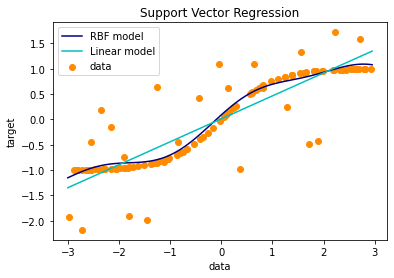

In [36]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_rbf, color='navy', label='RBF model')
plt.plot(X_test, y_lin, color='c',  label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()